عنوان: Demo End-to-End (ML-assisted TPC for LoRaWAN)
هدف: اجرای کامل پایپ‌لاین: بررسی داده → آموزش مدل‌ها → پیش‌بینی SNR → تصمیم‌های TPC → تحلیل و نمودارها

In [1]:
#تنظیم مسیرها و importها 
import os,sys
from pathlib import Path

# Ensure project root is on PYTHONPATH
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.insert(0, str(PROJECT_ROOT))
env = os.environ.copy()
env["PYTHONPATH"] = str(PROJECT_ROOT)
print("PROJECT_ROOT =", PROJECT_ROOT)

import pandas as pd
import matplotlib.pyplot as plt

from src import config


PROJECT_ROOT = /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan


In [2]:
#اجرا از ریشه ی پروژه
import os, sys, subprocess
from pathlib import Path

# اگر نوت‌بوک داخل notebooks است، ریشه پروژه می‌شود parent
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
print("Kernel CWD:", Path.cwd())
print("PROJECT_ROOT:", PROJECT_ROOT)

def run_module(mod: str):
    cmd = [sys.executable, "-m", mod]
    print("\nRunning:", " ".join(cmd))
    # مهم: اجرای subprocess از ریشه پروژه تا src دیده شود
    env = os.environ.copy()
    env["PYTHONPATH"] = str(PROJECT_ROOT)  # اختیاری ولی مطمئن‌تر
    return subprocess.run(cmd, check=True, cwd=str(PROJECT_ROOT), env=env)



Kernel CWD: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/notebooks
PROJECT_ROOT: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan


In [3]:
#بارگذاری دیتای خام و نمایش سریع
df = pd.read_csv(config.DATA_RAW)
print("Shape:", df.shape)
display(df.head(5))
display(df.describe(include="all").transpose().head(18))


Shape: (359, 18)


,num,timestamp,counter,device_id,distance,rssi,snr,sf,frequency,airtime,energy,length,temperature,rh,bp,pm2_5,pm10,log_distance
0,244197,2021-11-04,66749,EN1,2140.0,-73,0.2,9,905300000,0.267264,1.369,208,20.5,80.0,849.5,9.0,10.0,3.330414
1,251493,2021-11-05,69888,EN1,2140.0,-73,5.2,8,904300000,0.287232,1.383,624,23.9,62.4,851.7,26.0,28.0,3.330414
2,264672,2021-11-06,76321,EN1,2140.0,-72,8.5,8,903900000,0.338432,1.401,808,31.7,35.0,849.3,82.0,84.0,3.330414
3,277490,2021-11-07,81316,EN1,2140.0,-73,10.0,9,904900000,0.246784,1.368,144,23.8,67.3,852.4,9.0,10.0,3.330414
4,295046,2021-11-08,87795,EN1,2140.0,-71,10.0,9,904100000,0.205824,1.441,72,27.7,51.0,849.4,37.0,39.0,3.330414


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
num,359.0,NaN,NaN,NaN,804292.470752,437644.61737,216.0,414029.0,839810.0,1178628.5,1519093.0
timestamp,359,148,2021-11-04,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
counter,359.0,NaN,NaN,NaN,173048.128134,112994.100803,31.0,79949.5,160781.0,252907.0,440983.0
device_id,359,4,EN3,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance,359.0,NaN,NaN,NaN,5273.871866,2178.476941,2140.0,3450.0,6100.0,6100.0,8260.0
rssi,359.0,NaN,NaN,NaN,-83.203343,9.213203,-100.0,-93.0,-81.0,-75.0,-67.0
snr,359.0,NaN,NaN,NaN,-3.030084,7.973286,-16.8,-11.65,-1.5,4.1,10.0
sf,359.0,NaN,NaN,NaN,8.94429,1.149309,7.0,8.0,9.0,10.0,10.0
frequency,359.0,NaN,NaN,NaN,904546796.657382,444248.836092,903900000.0,904100000.0,904500000.0,904900000.0,905300000.0
airtime,359.0,NaN,NaN,NaN,0.310446,0.091271,0.056576,0.261376,0.370688,0.370688,0.399872


In [4]:
#اجرای sanity_check
import subprocess

cmd = [sys.executable, "-m", "src.sanity_check"]
print("Running:", " ".join(cmd))
subprocess.run(cmd, check=True, cwd=str(PROJECT_ROOT), env=env)


Running: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/.venv/bin/python -m src.sanity_check
Shape: (359, 18)
Columns: ['num', 'timestamp', 'counter', 'device_id', 'distance', 'rssi', 'snr', 'sf', 'frequency', 'airtime', 'energy', 'length', 'temperature', 'rh', 'bp', 'pm2_5', 'pm10', 'log_distance']

Head:
       num   timestamp  counter device_id  ...     bp  pm2_5  pm10  log_distance
0  244197  2021-11-04    66749       EN1  ...  849.5    9.0  10.0      3.330414
1  251493  2021-11-05    69888       EN1  ...  851.7   26.0  28.0      3.330414
2  264672  2021-11-06    76321       EN1  ...  849.3   82.0  84.0      3.330414
3  277490  2021-11-07    81316       EN1  ...  852.4    9.0  10.0      3.330414
4  295046  2021-11-08    87795       EN1  ...  849.4   37.0  39.0      3.330414

[5 rows x 18 columns]

Missing values per column:
 num             0
timestamp       0
pm10            0
pm2_5           0
bp              0
rh              0
temperature     0
length          0
energy  

CompletedProcess(args=['/Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/.venv/bin/python', '-m', 'src.sanity_check'], returncode=0)

In [5]:
#آموزش مدل‌های baseline (ridge/svr/rf)
import subprocess

cmd = [sys.executable, "-m", "src.train_baselines"]
print("Running:", " ".join(cmd))
subprocess.run(cmd, check=True, cwd=str(PROJECT_ROOT), env=env)

# Show model_metrics if exists
metrics_path = config.PRED_DIR / "model_metrics.csv"
if metrics_path.exists():
    metrics = pd.read_csv(metrics_path)
    display(metrics)
else:
    print("model_metrics.csv not found at:", metrics_path)

#RMSE: ریشه میانگین مربعات خطا. هرچه کمتر باشد، مدل دقیق‌تر است.
#R²: ضریب تعیین. هرچه به ۱ نزدیک‌تر باشد، مدل واریانس بیشتری از داده را توضیح می‌دهد.



Running: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/.venv/bin/python -m src.train_baselines
   model      rmse        r2
0  ridge  1.345651  0.969065
2    svr  1.384239  0.967266
1     rf  1.454968  0.963835
Saved models to: models_trained


,model,rmse,r2
0,ridge,1.345651,0.969065
1,svr,1.384239,0.967266
2,rf,1.454968,0.963835


In [6]:
#اجرای پایپ‌لاین end-to-end و تولید خروجی‌ها
import subprocess

cmd = [sys.executable, "-m", "src.run_pipeline"]
print("Running:", " ".join(cmd))
subprocess.run(cmd, check=True, cwd=str(PROJECT_ROOT), env=env)

print("Predictions:", config.SNR_PREDICTIONS_CSV)
print("Decisions:", config.TPC_DECISIONS_CSV)
print("Figures dir:", config.FIG_DIR)


Running: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/.venv/bin/python -m src.run_pipeline
Saved predictions: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/outputs/predictions/snr_predictions.csv
Saved decisions: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/outputs/predictions/tpc_decisions.csv
Saved figures in: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/outputs/figures
Predictions: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/outputs/predictions/snr_predictions.csv
Decisions: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/outputs/predictions/tpc_decisions.csv
Figures dir: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/outputs/figures


In [7]:
#مشاهده خروجی‌ها (CSVها)
pred = pd.read_csv(config.SNR_PREDICTIONS_CSV)
dec = pd.read_csv(config.TPC_DECISIONS_CSV)

print("snr_predictions.csv:", pred.shape)
display(pred.head(5))

print("tpc_decisions.csv:", dec.shape)
display(dec.head(5))


snr_predictions.csv: (359, 2)


,snr_true,snr_pred
0,0.2,5.363260
1,5.2,5.820735
2,8.5,6.753696
3,10.0,6.115449
4,10.0,7.300198


tpc_decisions.csv: (359, 4)


,sf_new,tp_new,me,energy_norm
0,7,12.0,0.863260,0.019717
1,7,11.0,0.320735,0.015662
2,7,10.0,0.253696,0.012441
3,7,11.0,0.615449,0.015662
4,7,10.0,0.800198,0.012441


In [8]:
#اجرای summarize_results و نمایش KPIها
import subprocess

cmd = [sys.executable, "-m", "src.summarize_results"]
print("Running:", " ".join(cmd))
subprocess.run(cmd, check=True, cwd=str(PROJECT_ROOT), env=env)


Running: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/.venv/bin/python -m src.summarize_results
{'count': 359, 'energy_norm_mean': 0.3789, 'energy_norm_median': 0.0993, 'pct_energy_below_1': 67.4095, 'pct_energy_below_0_5': 66.5738, 'sf_mode': 12, 'sf_min': 7, 'sf_max': 12, 'sf_top_counts': {'12': 119, '7': 117, '9': 54, '8': 37, '10': 25, '11': 7}, 'tp_mean': 12.9164, 'tp_median': 14.0, 'tp_min': 7.0, 'tp_max': 14.0, 'tp_top_counts': {'14.0': 185, '13.0': 70, '12.0': 51, '11.0': 20, '10.0': 18, '9.0': 7, '8.0': 6, '7.0': 2}, 'me_mean': -0.7219, 'me_median': 0.2594, 'pct_me_ge_0': 68.8022}


CompletedProcess(args=['/Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/.venv/bin/python', '-m', 'src.summarize_results'], returncode=0)

Showing: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/outputs/figures/snr_true_vs_pred.png


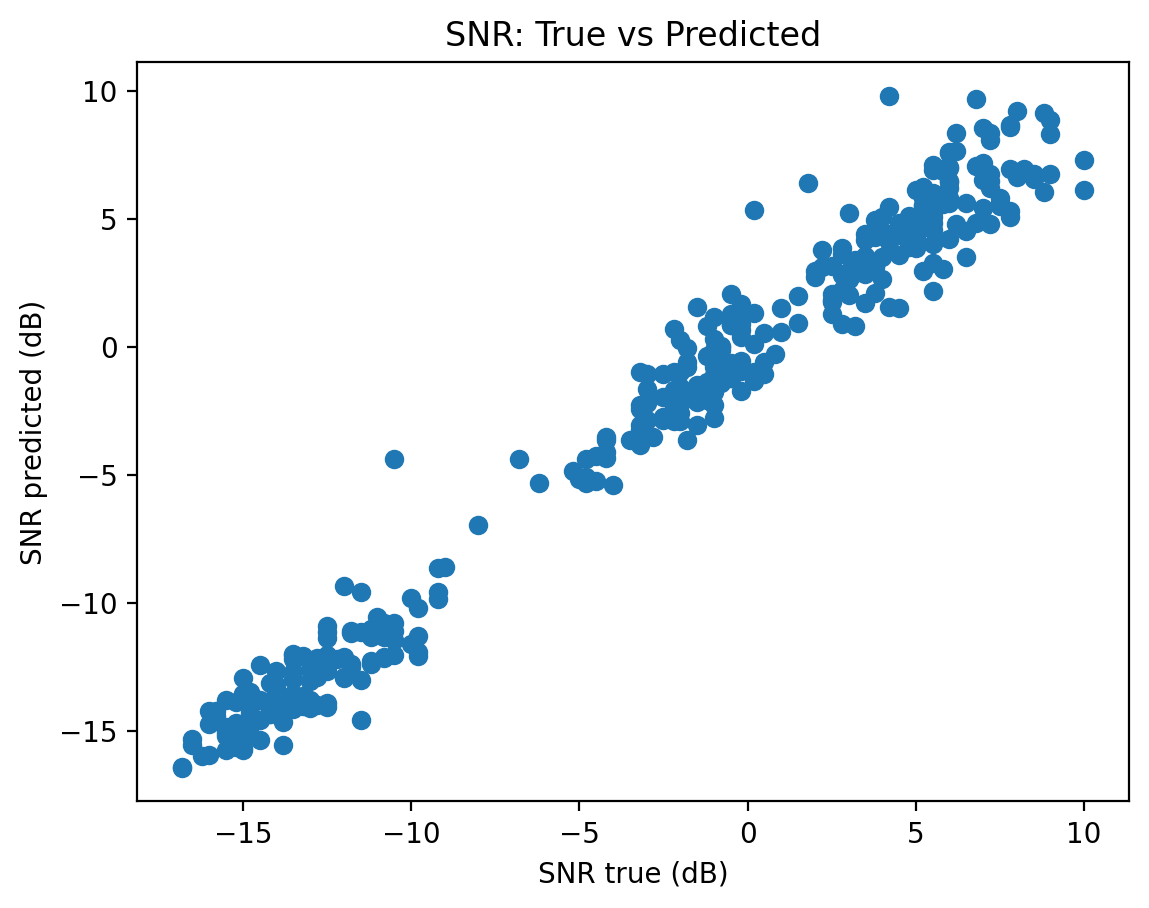

Showing: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/outputs/figures/sf_distribution.png


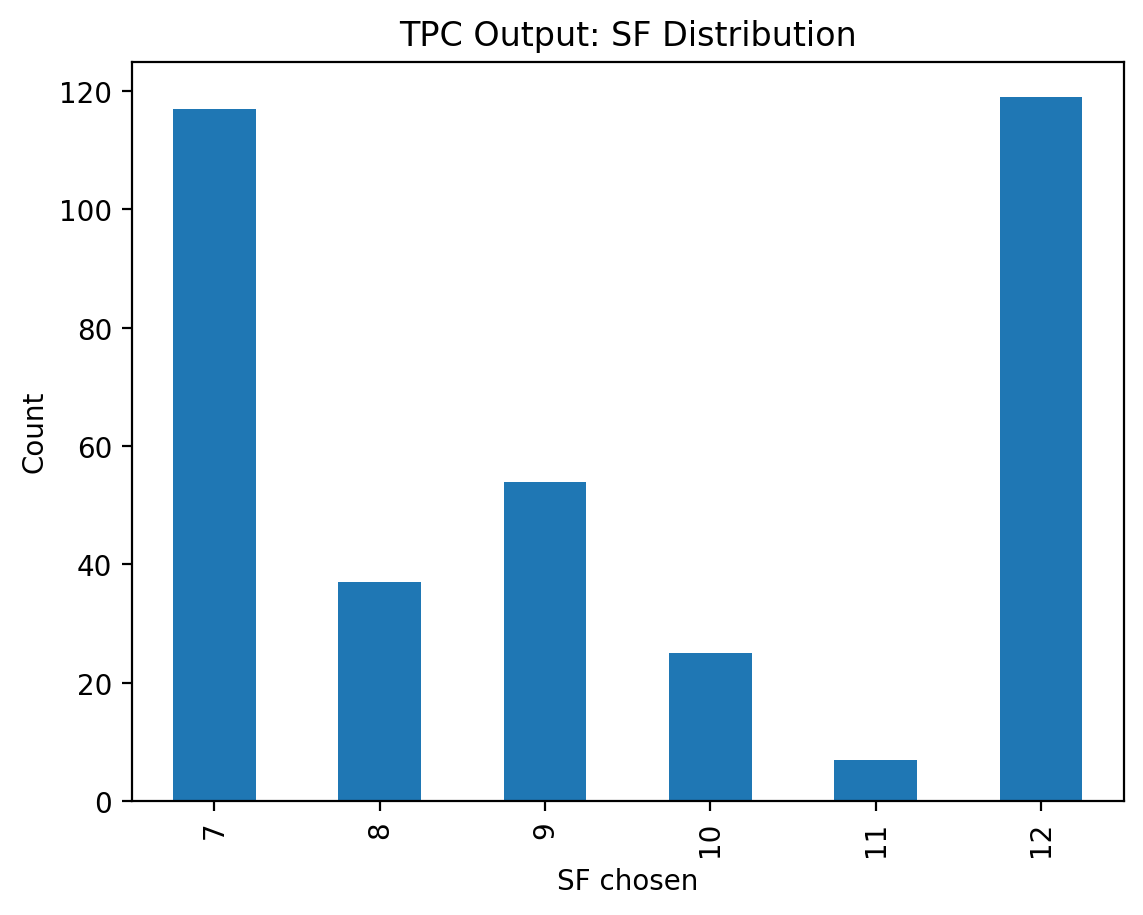

Showing: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/outputs/figures/tp_distribution.png


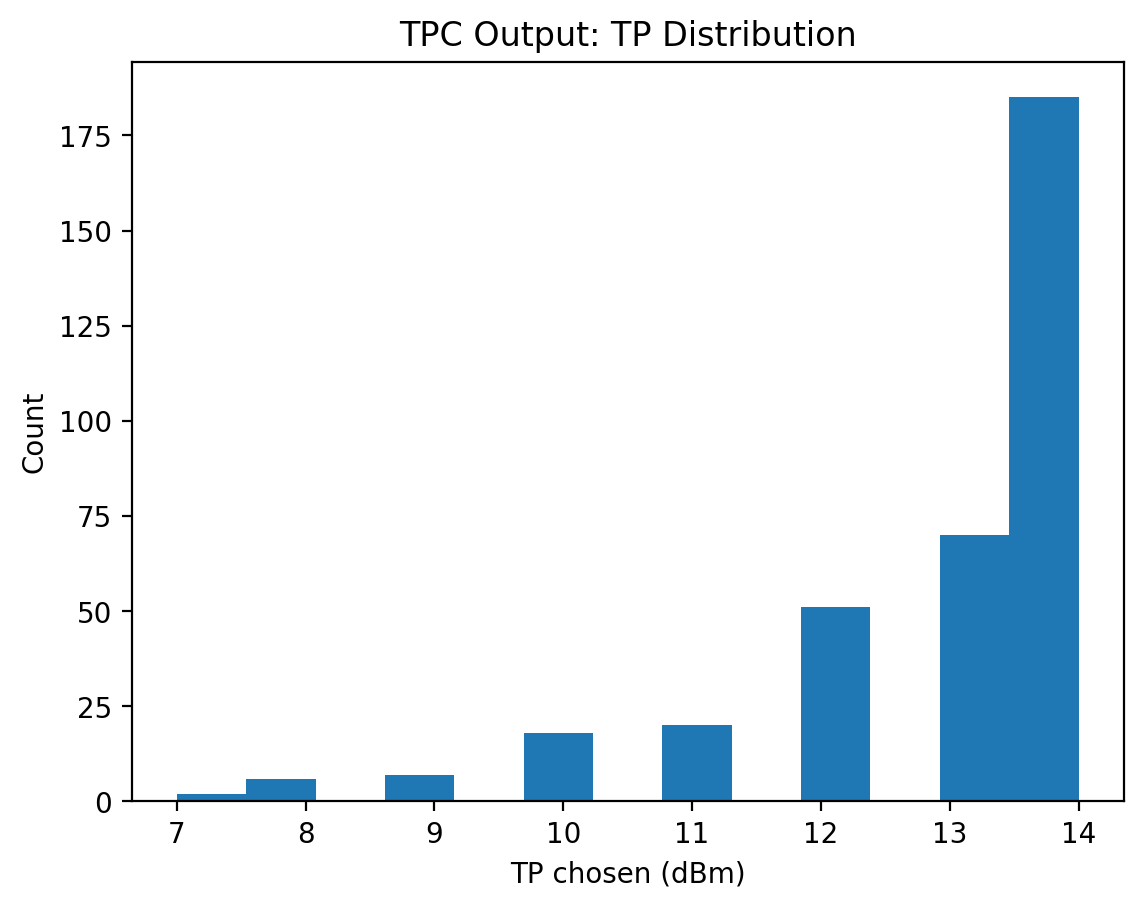

Showing: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/outputs/figures/me_distribution.png


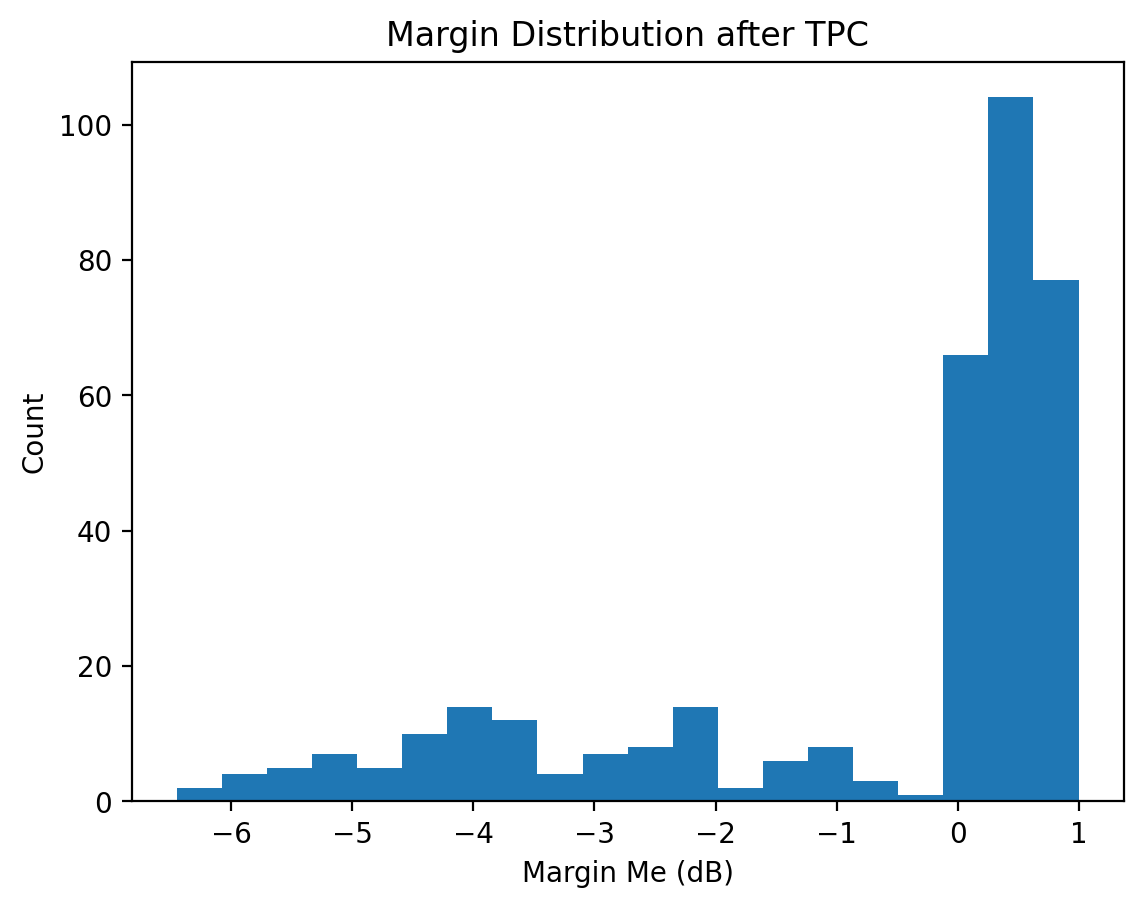

Showing: /Users/aria/Documents/Masters_Projects/ML_TPC_Lorawan/outputs/figures/energy_norm_hist.png


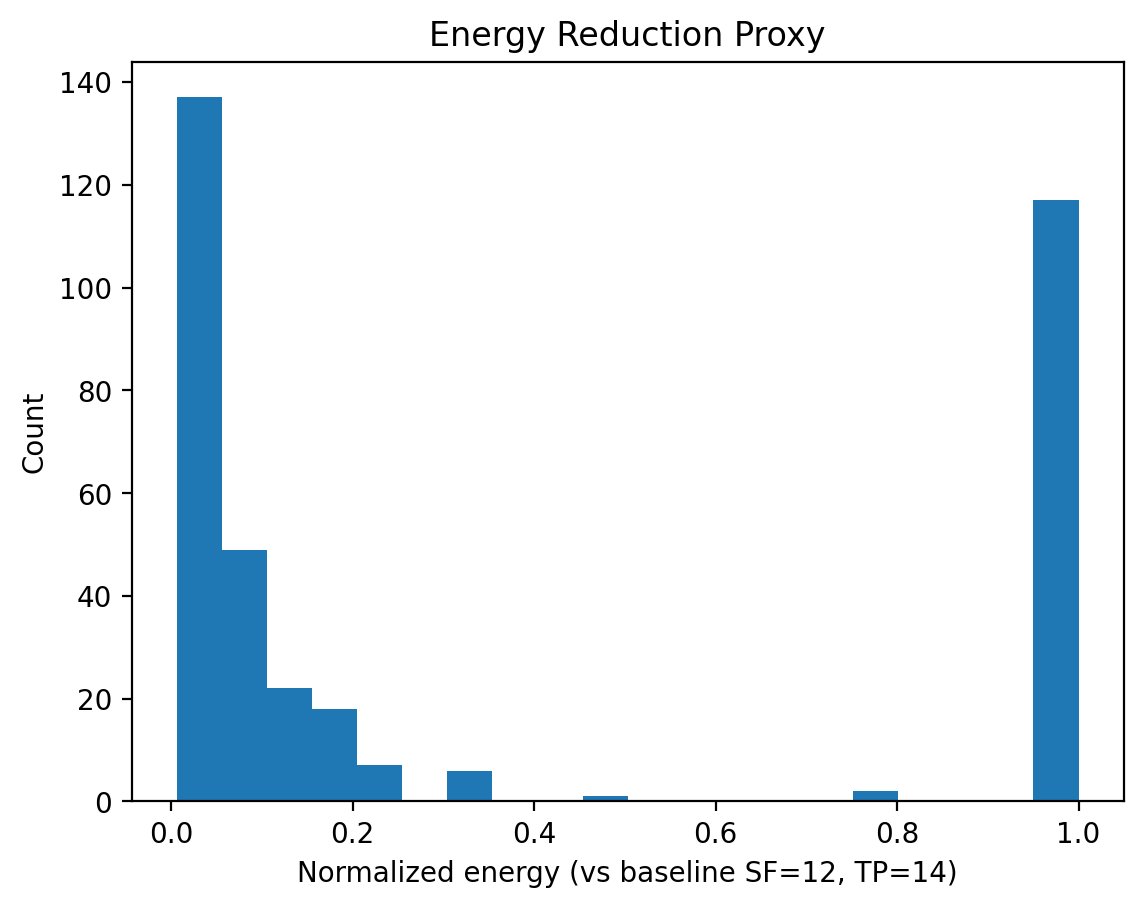

In [9]:
#نمایش تصاویر خروجی داخل نوت‌بوک
from IPython.display import Image, display

figs = [
    "snr_true_vs_pred.png",
    "sf_distribution.png",
    "tp_distribution.png",
    "me_distribution.png",
    "energy_norm_hist.png",
]

for f in figs:
    p = config.FIG_DIR / f
    print("Showing:", p)
    display(Image(filename=str(p)))


In [12]:
#جدول خلاصه توزیع SF/TP و درصد Me≥0
import pandas as pd
from src import config
from src.tpc import snr_limit
from src.energy import normalized_energy

# خروجی‌های پایپ‌لاین
dec = pd.read_csv(config.TPC_DECISIONS_CSV)          # sf_new, tp_new, me, energy_norm
pred = pd.read_csv(config.SNR_PREDICTIONS_CSV)       # snr_true, snr_pred

# هم‌ردیف کردن (چون هر دو فایل به ترتیب یکسان ساخته شده‌اند)
assert len(dec) == len(pred), "Length mismatch between predictions and decisions!"
df = pd.concat([pred, dec], axis=1)

# -------- Baseline (قبل از TPC) --------
df["sf_old"] = config.BASELINE_SF
df["tp_old"] = float(config.BASELINE_TP)

# تعریف Margin برای baseline:
# Me_old = SNR_pred - SNR_limit(SF_old) - LM
df["me_old"] = df["snr_pred"] - snr_limit(df["sf_old"].iloc[0]) - config.LINK_MARGIN_DB

# انرژی baseline نسبت به خودش = 1
df["energy_norm_old"] = 1.0

# -------- نمایش مقایسه توزیع‌ها --------
print("SF counts (old vs new):")
sf_cmp = pd.DataFrame({
    "old": df["sf_old"].value_counts().sort_index(),
    "new": df["sf_new"].value_counts().sort_index(),
}).fillna(0).astype(int)
display(sf_cmp)

print("TP counts (old vs new):")
tp_cmp = pd.DataFrame({
    "old": df["tp_old"].value_counts().sort_index(),
    "new": df["tp_new"].value_counts().sort_index(),
}).fillna(0).astype(int)
display(tp_cmp)

# -------- درصد Margin >= 0 --------
pct_me_ge_0_old = (df["me_old"] >= 0).mean() * 100
pct_me_ge_0_new = (df["me"] >= 0).mean() * 100

print("pct_me_ge_0_old =", round(pct_me_ge_0_old, 2), "%")
print("pct_me_ge_0_new =", round(pct_me_ge_0_new, 2), "%")

# -------- خلاصه انرژی (کامل‌تر) --------
energy_mean_new = float(df["energy_norm"].mean())
energy_median_new = float(df["energy_norm"].median())

pct_energy_below_1_new = float((df["energy_norm"] < 1.0).mean() * 100)
pct_energy_below_0_5_new = float((df["energy_norm"] < 0.5).mean() * 100)

# کاهش نسبت به baseline=1.0
mean_reduction_pct = (1.0 - energy_mean_new) * 100
median_reduction_pct = (1.0 - energy_median_new) * 100

print("\n--- Energy summary ---")
print("energy_norm_old mean =", float(df["energy_norm_old"].mean()))  # همیشه 1.0
print("energy_norm_new mean =", round(energy_mean_new, 4))
print("energy_norm_new median =", round(energy_median_new, 4))

print("pct_energy_below_1_new =", round(pct_energy_below_1_new, 2), "%")
print("pct_energy_below_0_5_new =", round(pct_energy_below_0_5_new, 2), "%")

print("mean_energy_reduction_vs_baseline =", round(mean_reduction_pct, 2), "%")
print("median_energy_reduction_vs_baseline =", round(median_reduction_pct, 2), "%")


SF counts (old vs new):


,old,new
7,0,117
8,0,37
9,0,54
10,0,25
11,0,7
12,359,119


TP counts (old vs new):


,old,new
7.0,0,2
8.0,0,6
9.0,0,7
10.0,0,18
11.0,0,20
12.0,0,51
13.0,0,70
14.0,359,185


pct_me_ge_0_old = 68.8 %
pct_me_ge_0_new = 68.8 %

--- Energy summary ---
energy_norm_old mean = 1.0
energy_norm_new mean = 0.3789
energy_norm_new median = 0.0993
pct_energy_below_1_new = 67.41 %
pct_energy_below_0_5_new = 66.57 %
mean_energy_reduction_vs_baseline = 62.11 %
median_energy_reduction_vs_baseline = 90.07 %
